<a href="https://colab.research.google.com/github/MunySafitri/AHP-Algorithm-project/blob/main/PCD_Assignment02_Image_Enhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Image Enhancement**
adalah perbaikan kualitas citra
tujuannnya adalah memeperoleh citra yang lebih sesuai digunakana untuk aplikasi lebih lanjut(misal mengenali objek di dalam citra), image enhancement merupakan satu proses awal dalam pengolahan citra(preprocessing)

mengapa memerlukan image inhancement?



1.   citra mengandung derau (noise)
2.   citra terlalu terang/gelap, citra kurang tajam, kabur (blur)
3.   cacat saat akuisisi citra: 
    -  lensa: object blurring atau background blurring
    - objek bergerak kamera bergerak: motion blurring
4. distorsi geometrik disebabkan oleh lensa atau sudut pengambilan






In [ ]:
from PIL import Image
import matplotlib.pyplot as plt #kita gunakan untuk menampilkan sesuai operasi sistem
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
%matplotlib inline

#Blurred


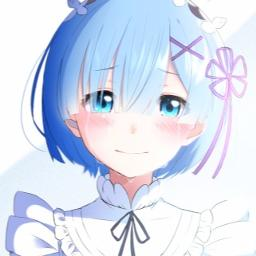

In [ ]:
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/img/asal.jpg')
cv2_imshow(image)

**Konvolusi Diskret**
konvolusi diskret dilakukan sampai semua piksel citra input terkena perhitungan konvolusi. 
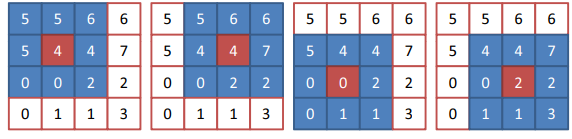

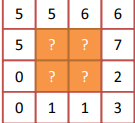

diperlukan padding dengan menyalin nilai piksel terdekat supaya piksel input yang tidak ada -tetapi dibutuhkan- dapat terpenuhi

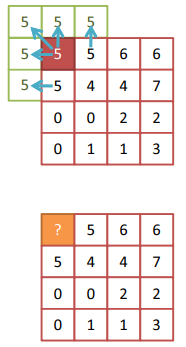


In [ ]:
#konvolusi Diskret
def pad (matrix, banyak_padding):
    padded_matrix = np.pad(matrix,(0,banyak_padding),'constant')
    return padded_matrix

Membuat method Blurring

kernel untuk bluring/pengaburan menggunakan prinsip bahwa nilai piksel pusat harus dibuat mendekati piksel tetangganya (mengurangi perbedaan)
disini menggunakan mean filter

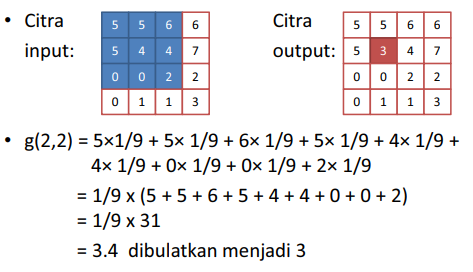

In [ ]:
def blur(img, size) :#linear filter(mean)
    fin = np.zeros((len(img),len(img)))
    matrix = pad(img, size)
    repeat = len(img)
    for x in range(size,len(matrix)-size) :
        for y in range(size,len(matrix)-size) :
            all = np.ravel(matrix[x-size:x+size+1,y-size:y+size+1])#kernel 
            #np.ravel menghasilkan luaran matriks 1D
            blur = round(np.sum(all)/(size*size))#atau dibagi 9 # blur = round(np.sum(all)/9)
            fin[x][y] = blur
    
    return fin

tampilkan gambar blur

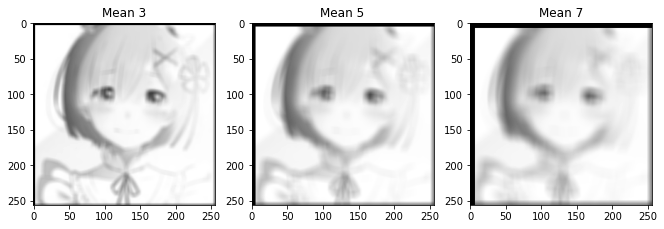

In [ ]:
mean3 = blur(image, 3)
mean5 = blur(image, 5)
mean7 = blur(image, 7)

plt.figure(figsize=(15,15))

plt.subplot(2,4,2)
plt.imshow(mean3, cmap="gray")
plt.title('Mean 3');

plt.subplot(2,4,3)
plt.imshow(mean5, cmap="gray")
plt.title('Mean 5');

plt.subplot(2,4,4)
plt.imshow(mean7, cmap="gray")
plt.title('Mean 7');

plt.show()

#Image Brightening
Kecerahan citra dapat diperbaiki dengan menambahkan/mengurangkan
sebuah konstanta kepada (atau dari) setiap pixel, atau mengalikan
sebuah konstansta ke setiap pixel.

r = s + b

• Jika b positif, kecerahan citra bertambah,
Jika b negatif kecerahan citra berkurang

• Perlu operasi clipping jika nilai r + b berada di bawah nilai intensitas
minimum atau di atas nilai intensitas maksimum:
- jika r + b > 255, maka s = 255
- jika r + b < 0, maka s = 0

• Operasi pencerahan yang lain adalah menggunakan rumus:

r = as + b

a dan b adalah konstanta


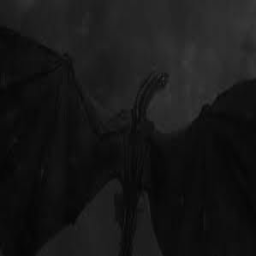

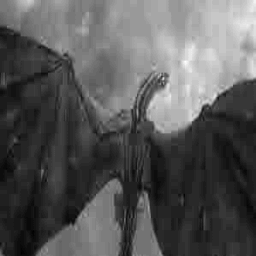

In [ ]:
h, w=256, 256
image5 = cv.imread('/content/drive/MyDrive/Colab Notebooks/img/dark.jpg')
image5=cv.cvtColor(image5,cv.COLOR_BGR2GRAY)
image5=cv.resize(image5, (h,w))

Min=image5.min()#mencari nilai minimum
Max=image5.max()#mencari nilai maksimum

a, b = 0, 255
result = np.zeros((h, w), dtype=np.uint8)
for i in range(0,h):
  for j in range(0,w):
    # print(i)
    result[i][j]=(image5[i][j]-Min)*0.5*((b-a)/(Max-Min))+a 

cv2_imshow(image5)
cv2_imshow(output)

#LOW CONTRAST and BRIGHT

costrast adalah perbedaan antara intensitas pixel maksimum dan minimum

tujuannya untuk meningatkan rentang nilai-nilai keabuan untuk citra kontrasrendah (terentang dari 0 sampai 255 pada citra 8-bit)

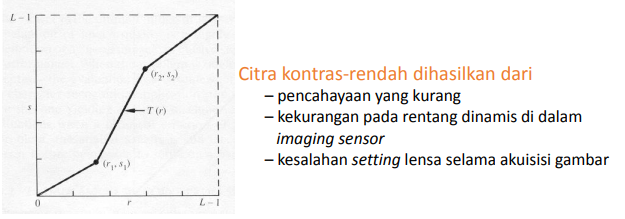

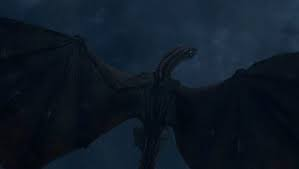

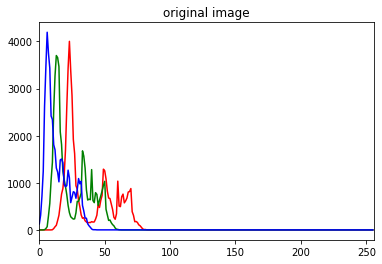

In [ ]:
image2 = cv.imread('/content/drive/MyDrive/Colab Notebooks/img/dark.jpg')
cv2_imshow(image2)

#melihat histogram
color = ['r', 'g', 'b']
for i,col in enumerate(color):
  histogr = cv.calcHist([image2], [i], None, [256], [0,256])
  plt.plot(histogr, color = col)
  plt.xlim([0,256])
plt.title('original image');
plt.show()

True

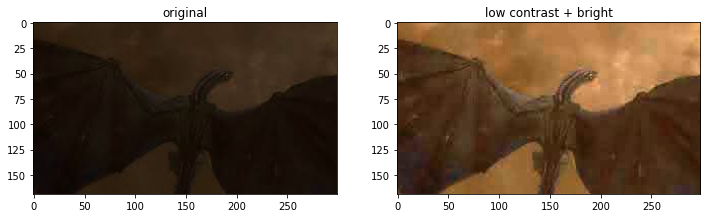

In [ ]:
#buat array kosong pada variabel new image
new_image = np.zeros(image2.shape,image2.dtype)
#definisikan nilai contrast dan bright
contrast = 3.0
bright =2

plt.figure(figsize=(25,25))

#mengubah nilai gambar
for y in range(image2.shape[0]):
  for x in range(image2.shape[1]):
    for c in range(image2.shape[2]):
      # print(x)
      new_image[y,x,c]= np.clip(contrast*image2[y,x,c] + bright,0,255)
      #np.clip is untuk klip (batas) elemen dalam array,Di clip() fungsi, lewati interval (kombinasi nilai minimum dan nilai maksimum),
      # print( new_image[y,x,c])

# plt.figure(figsize=(25,25))
plt.subplot(2,4,3)
plt.imshow(image2)
plt.title('original');
plt.subplot(2,4,4)
plt.imshow(new_image)
plt.title('low contrast + bright');
cv.imwrite("Low_Contrast_bright.jpg", new_image)


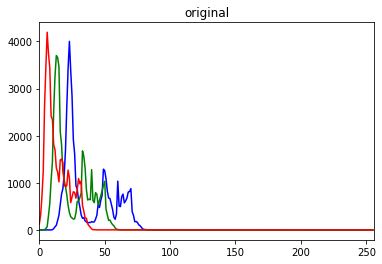

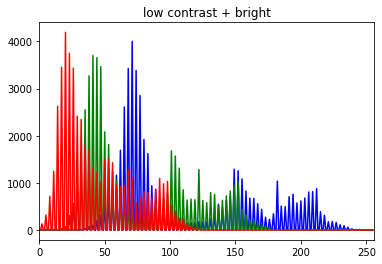

In [ ]:
color = ('b','g','r')

for i,col in enumerate(color):
  histogr = cv.calcHist([image2], [i], None, [256], [0,256])
  plt.plot(histogr, color = col)
  plt.xlim([0,256])
plt.title('original');
plt.show()

for i,col in enumerate(color):
  histogr = cv.calcHist([new_image], [i], None, [256], [0,256])
  plt.plot(histogr, color = col)
  plt.xlim([0,256])
plt.title('low contrast + bright');
plt.show()

##**testing**

In [ ]:
# import numpy as np
# arr = np.arange(15)
# print(arr)
# # Use numpy.  clip () function
# arr1 = np.  clip (arr, 2, 10)
# print("The clipped array:", arr1)

# # Output
# # The clipped array: [ 2  2  2  3  4  5  6  7  8  9 10 10 10 10 10]

hasil histogramnya

#High Contrast Image 

In [ ]:
def Max(nilaiSekarang, nilaiBaru):
	if nilaiBaru > nilaiSekarang:
		return nilaiBaru
	else:
		return nilaiSekarang
		
def Min(nilaiSekarang, nilaiBaru):
	if nilaiBaru < nilaiSekarang:
		return nilaiBaru
	else:
		return nilaiSekarang

def Histogram_Computation(Image):
	tinggi = Image.shape[0]
	lebar = Image.shape[1]
	channel = Image.shape[2]
	
	Histogram = np.zeros([256, channel], np.int32)
	
	maxIntensitas = np.zeros([channel], np.int32)
	minIntensitas = np.full([channel], 255, np.int32)
	
	for x in range(0, tinggi):
		for y in range(0, lebar):
			for c in range(0, channel):
				Histogram[Image[x,y,c],c] +=1
				maxIntensitas[c] = Max(maxIntensitas[c], Image[x,y,c])
				minIntensitas[c] = Min(minIntensitas[c], Image[x,y,c])
	
	return Histogram, minIntensitas, maxIntensitas

def New_Pixel_Value(nilaiSekarang, Min, Max):
	Target_Max = 255
	Target_Min = 0
	return (Target_Min + (nilaiSekarang - Min) * int(Target_Max-Target_Min)/(Max-Min))

def Histogram_Equalization(Image, Min, Max):
	tinggi = Image.shape[0]
	lebar = Image.shape[1]
	channel = Image.shape[2]
	Size = (tinggi, lebar, channel)
	
	citraBaru = np.zeros(Size, np.uint8)
	
	for x in range(0, tinggi):
		for y in range(0, lebar):
			for c in range(0, channel):
				citraBaru[x,y,c] = New_Pixel_Value(Image[x,y,c], Min[c], Max[c])
	
	return citraBaru

In [ ]:
Image = cv.imread("Low_Contrast_bright.jpg") # 
Histogram_GrayScale, Min, Max = Histogram_Computation(Image)
	
New_Image = Histogram_Equalization(Image, Min, Max)
	#Now to print our output Histogram


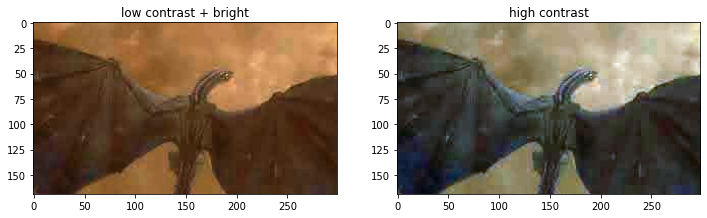

In [ ]:
plt.figure(figsize=(25,25))
plt.subplot(2,4,2)
plt.title('low contrast + bright');
plt.imshow(Image)
plt.subplot(2,4,3)
plt.title('high contrast');
plt.imshow(New_Image)

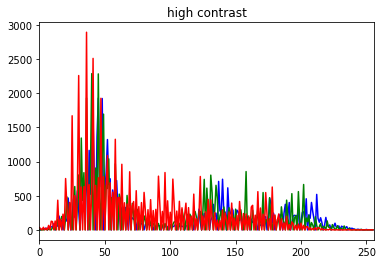

In [ ]:
color = ('b','g','r')
for i,col in enumerate(color):
  histogr = cv.calcHist([New_Image], [i], None, [256], [0,256])
  plt.plot(histogr, color = col)
  plt.xlim([0,256])
plt.title('high contrast');
plt.show()

#Bright Image

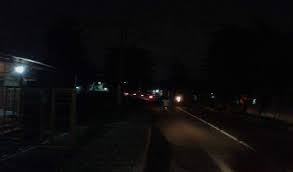

(172, 293, 3)

In [ ]:
image3 = cv.imread('/content/drive/MyDrive/Colab Notebooks/img/minim_terang.jpg')
cv2_imshow(image3)
# image2 = cv.cvtColor(image2,cv.COLOR_BGR2GRAY)
# cv2_imshow(image2)
image3.shape

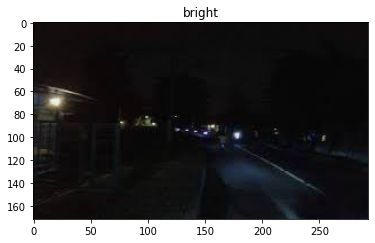

In [ ]:
bright = 4
new_image2 = np.zeros(image3.shape,image3.dtype)

for y in range(image3.shape[0]):
  for x in range(image3.shape[1]):
    for c in range(image3.shape[2]):
      # print(x)
      new_image2[y,x,c]= np.clip(image3[y,x,c] + bright,0,255)
plt.title('bright');
plt.imshow(new_image2)

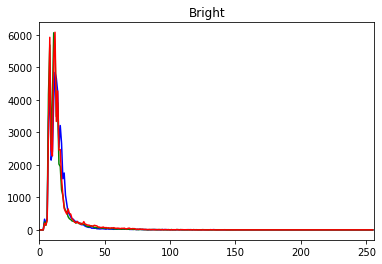

In [ ]:
color = ('b','g','r')

for i,col in enumerate(color):
  histogr = cv.calcHist([new_image2], [i], None, [256], [0,256])
  plt.plot(histogr, color = col)
  plt.xlim([0,256])
plt.title('Bright');
plt.show()

#Histogram Equalization

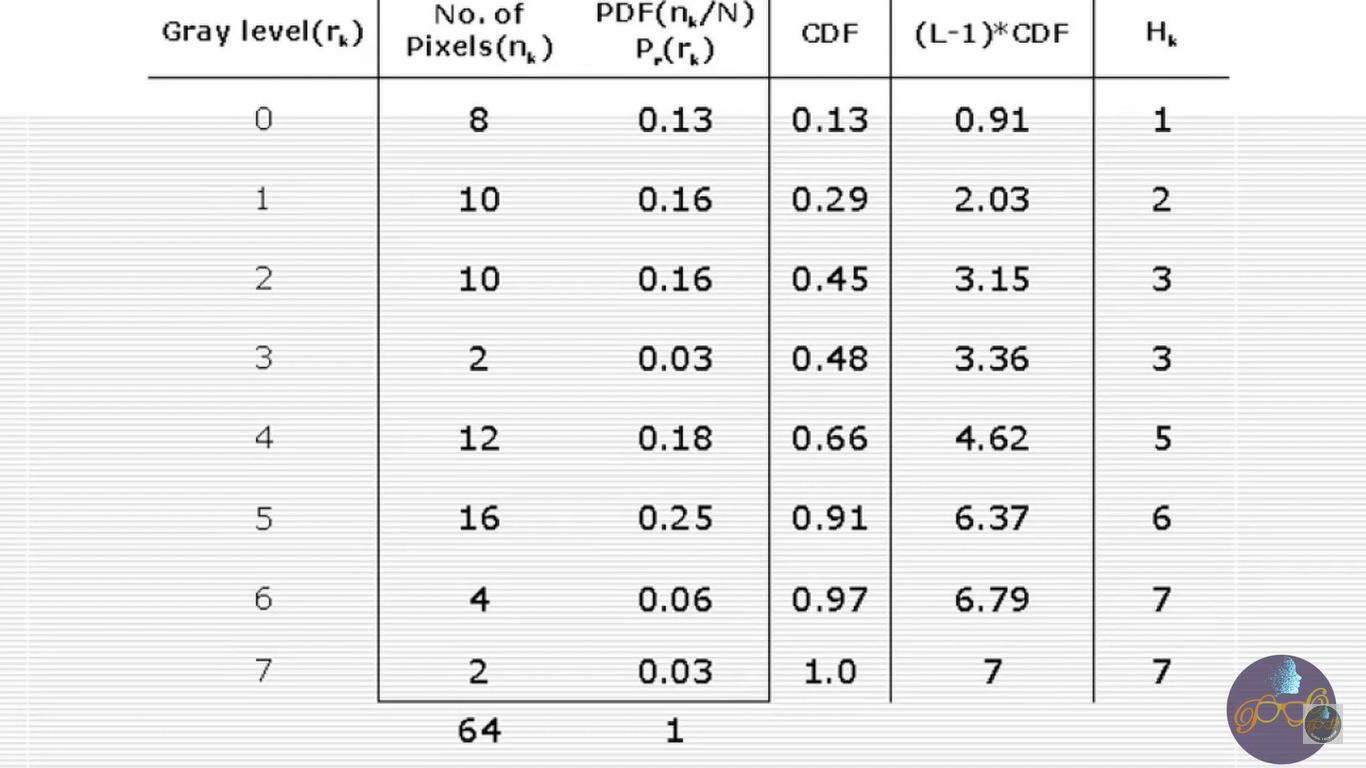

In [ ]:
import math

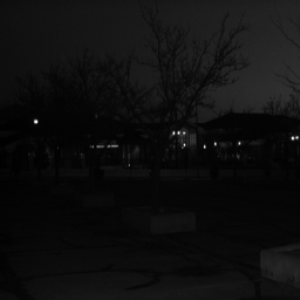

In [ ]:
image4 = cv.imread('/content/drive/MyDrive/Colab Notebooks/img/minim_terang2.png')
image4 = cv.resize(image4, (300,300))
ukuran = image4.shape
cv2_imshow(image4)
# imageGray = .cvtColor(image4, cv2.COLOR_BGR2GRAY)

Rumus GreyScale

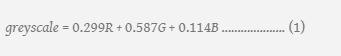

In [ ]:
#gray scale
b= image4[:,:,0]
g= image4[:,:,1]
r = image4[:,:,2]
image4Gray= np.zeros((len(image4),len(image4[0])))

for baris in range(len(image4)):
  for kolom in range(len(image4[0])):
    image4Gray[baris,kolom] = round(0.299 *r[baris,kolom] + 0.587*g[baris,kolom] + 0.114 *b[baris,kolom])

HistEqual = image4Gray.astype(np.uint8)#harus dikonversi citra ke unsigned int

In [ ]:
def Hist(image):
  H = np.zeros(shape=(256,1))
  ukuran = image.shape
  for i in range(ukuran[0]):
    for j in range(ukuran[1]):
      k = round(image[i,j])
      H[k,0] = H[k,0]+1
  return H


In [ ]:
histg = Hist(HistEqual)
x = histg.reshape(1,256)
y = np.array([])
y = np.append(y,x[0,0]) 

for i in range(255):
  k = x[0,i+1] + y[i]
  y = np.append(y,k)
y = np.round((y/(ukuran[0]*ukuran[1]))*255)

for i in range(ukuran[0]):
  for j in range(ukuran[1]):
    k = int(HistEqual[i,j])
    HistEqual[i,j] = y[k]

cv2_imshow(HistEqual)
# print(image4Gray)

#Image Negative
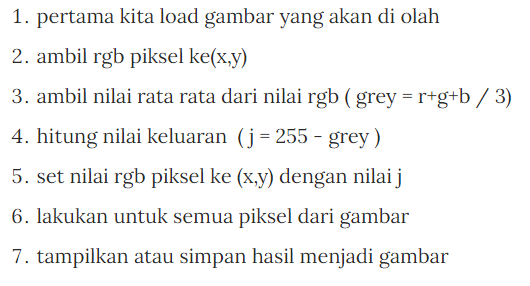

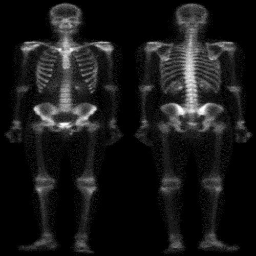

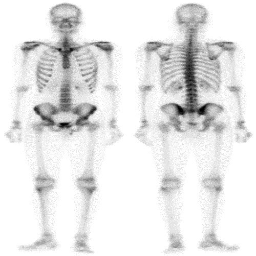

In [ ]:
h, w=256, 256
image5 = cv.imread('/content/drive/MyDrive/Colab Notebooks/img/skeleton.jpg')
image5 =cv.cvtColor(image5,cv.COLOR_BGR2GRAY)#mengubah ke nilai grey
image5 = cv.resize(image5, (w,h))

output = np.zeros((h, w), dtype=np.uint8)
for i in range(0,h):
  for j in range(0,w):
    # print(image5[i][j])
    output[i][j]=(255-image5[i][j])#L-1 karena ada index dari 0 sd 255

cv2_imshow(image5)
cv2_imshow(output)